# 03_3 Finding best Set of Features for SARIMAX Model

After trying on all combinations of features for Multivariate SARIMAX Cross Validation I will now find the best Prediction based on Root Mean Squared Error (RMSE) and Correlation to the true Price. As these two values won't give me a good indicator on a suitable model alone I will plot the top 50 for identifying a good model visually:

In [24]:
import pandas as pd
import ast
import data_prep_helper
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
arimax_result_dict = {}
for i in range (3,9):
    arimax_result_dict[i] = pd.read_csv("arimax_results/arimax_split_combinations_results_{}.csv".format(i))


In [9]:
arimax_result_dict[4].head()

Unnamed: 0  split_1_CORR     S_1_RMSE  split_2_CORR     S_2_RMSE  \
0           0      0.457233  4919.712865     -0.826872  5097.646054   
1           1      0.439857  4422.113864     -0.836329  4326.258559   
2           2      0.261913  4930.116720     -0.876336  4957.114606   
3           3      0.398694  4473.344817     -0.857660  5137.790348   
4           4      0.351482  4654.821338      0.490364  3279.554776   

   split_3_CORR     S_3_RMSE  \
0     -0.279770  5648.667421   
1      0.150295  5501.006859   
2     -0.689664  5975.611204   
3     -0.520529  5914.234032   
4      0.795124  4744.479843   

                                            FEATURES  NUM_FEATURES  
0  ('bitcoin_Google_Trends_prev_month', 'bitcoin_...             4  
1  ('bitcoin_Google_Trends_prev_month', 'bitcoin_...             4  
2  ('bitcoin_Google_Trends_prev_month', 'bitcoin_...             4  
3  ('bitcoin_Google_Trends_prev_month', 'bitcoin_...             4  
4  ('bitcoin_Google_Trends_prev_month', 'bitcoin_...             4

In [10]:
RMSE_COLS = ["S_{}_RMSE".format(i) for i in range(1,4)]
CORR_COLS = ["split_{}_CORR".format(i) for i in range(1,4)]

Summing th RMSE and Correlation Values for all three splits:

In [12]:
for i in range(3,9):
    arimax_result_dict[i]["RMSE_SUM"] = arimax_result_dict[i][RMSE_COLS].sum(axis=1)
    arimax_result_dict[i]["CORR_ABS_SUM"] = arimax_result_dict[i][CORR_COLS].sum(axis=1)

Only store features from previous month for getting the maximum of days to forecast and append all results for all feature lenghts together:

In [14]:
all_results = pd.DataFrame()
for i in range(3,9):
    arimax_result_dict[i] = arimax_result_dict[i][~ arimax_result_dict[i]["FEATURES"].str.contains("week")]
    all_results = pd.concat([all_results, arimax_result_dict[i]])
    

In [16]:
all_results.head()

Unnamed: 0  split_1_CORR     S_1_RMSE  split_2_CORR     S_2_RMSE  \
61          61      0.414353  4571.312633     -0.863916  4573.194922   
64          64      0.456686  4521.033711     -0.866671  4484.317213   
65          65      0.430151  4653.485838     -0.848504  3906.170826   
67          67      0.433154  4666.073164     -0.594402  3790.990800   
68          68      0.443186  4564.119988     -0.335381  3754.140821   

    split_3_CORR     S_3_RMSE  \
61     -0.605643  5853.430808   
64     -0.577110  5786.872684   
65     -0.348171  5584.082251   
67     -0.269219  5549.334042   
68      0.049030  4953.837456   

                                             FEATURES  NUM_FEATURES  \
61  ('bitcoin_Google_Trends_prev_month', 'bitcoin_...             3   
64  ('bitcoin_Google_Trends_prev_month', 'bitcoin_...             3   
65  ('bitcoin_Google_Trends_prev_month', 'bitcoin_...             3   
67  ('bitcoin_Google_Trends_prev_month', 'bitcoin_...             3   
68  ('bitcoin_Google_Trends_prev_month', 'bitcoin_...             3   

        RMSE_SUM  CORR_ABS_SUM  
61  14997.938363     -1.055206  
64  14792.223608     -0.987096  
65  14143.738915     -0.766525  
67  14006.398005     -0.430467  
68  13272.098265      0.156836

In [19]:
all_results.sort_values(by=["RMSE_SUM","CORR_ABS_SUM"]).head(10)

Unnamed: 0  split_1_CORR     S_1_RMSE  split_2_CORR     S_2_RMSE  \
16             16      0.409305  4630.318789      0.828187   913.326990   
32069       32069      0.446110  4453.608527      0.777715  1029.075023   
1740         1740      0.526196  3938.145401      0.707783  2011.839865   
169           169      0.557000  4674.650015      0.879572   913.563705   
8698         8698      0.484698  4472.900302      0.715505  1991.403001   
43             43      0.438588  4544.886014      0.812165  1056.107525   
191           191      0.470163  3972.639624      0.773187  1016.541431   
42             42      0.434500  4595.345255      0.755434  1194.811523   
41             41      0.493457  4584.646294      0.622593  1538.927923   
187           187      0.430105  4632.846144      0.804195  1053.444760   

       split_3_CORR     S_3_RMSE  \
16         0.257982  3230.982413   
32069      0.324893  3354.954165   
1740       0.136959  2971.102713   
169        0.728658  3468.399638   
8698       0.141684  2952.115028   
43         0.473109  3855.171188   
191       -0.106235  4501.860366   
42         0.429343  3776.671793   
41         0.144511  3762.708038   
187        0.217995  4268.036166   

                                                FEATURES  NUM_FEATURES  \
16     ('bitcoin_Google_Trends_prev_month', 'bitcoin_...             6   
32069  ('bitcoin_Price_prev_month', 'month-1', 'aliba...             5   
1740   ('alibaba_High_prev_month', 'amazon_High_prev_...             3   
169    ('bitcoin_Low_prev_month', 'bitcoin_Price_prev...             6   
8698   ('month-2', 'alibaba_High_prev_month', 'amazon...             4   
43     ('bitcoin_Google_Trends_prev_month', 'bitcoin_...             7   
191    ('bitcoin_High_prev_month', 'bitcoin_Price_pre...             6   
42     ('bitcoin_Google_Trends_prev_month', 'bitcoin_...             7   
41     ('bitcoin_Google_Trends_prev_month', 'bitcoin_...             7   
187    ('bitcoin_High_prev_month', 'bitcoin_Price_pre...             6   

          RMSE_SUM  CORR_ABS_SUM  
16     8774.628192      1.495475  
32069  8837.637715      1.548718  
1740   8921.087978      1.370938  
169    9056.613358      2.165230  
8698   9416.418332      1.341887  
43     9456.164727      1.723862  
191    9491.041421      1.137115  
42     9566.828572      1.619277  
41     9886.282254      1.260561  
187    9954.327070      1.452295

In [26]:
feat_list = []
for feat in all_results.sort_values(by=["RMSE_SUM","CORR_ABS_SUM"]).head(50)["FEATURES"].values:
    feat_list.append(list(ast.literal_eval(feat)))


In [27]:
do = data_prep_helper.ShiftChartData(chart_col=["Price", "High", "Low"])

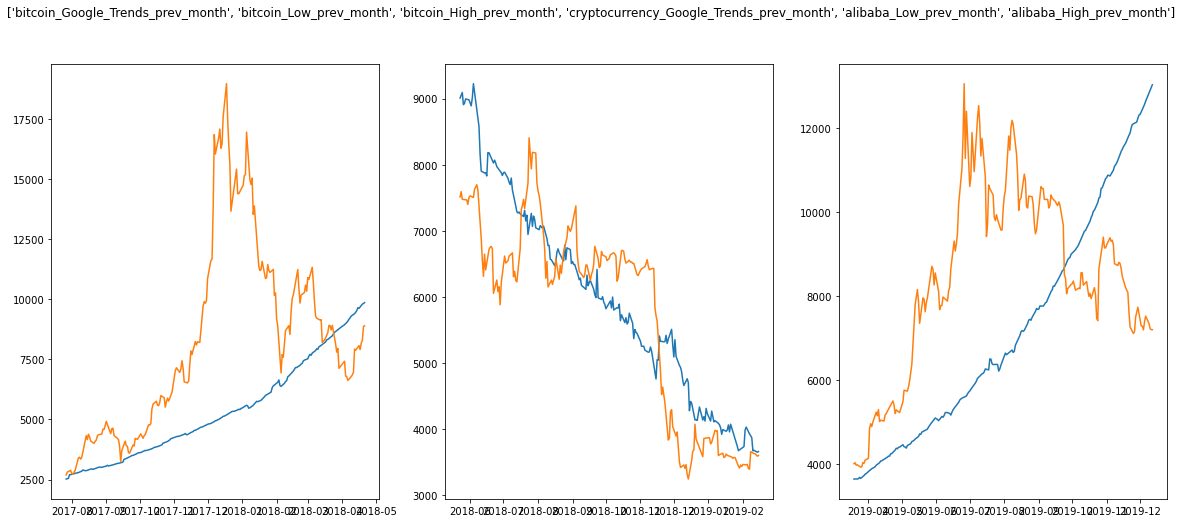

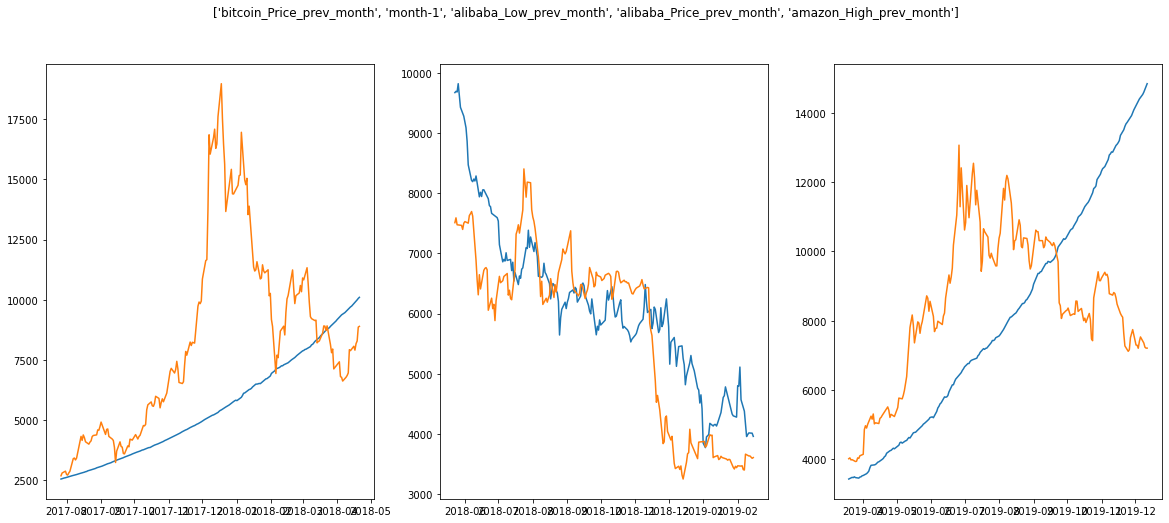

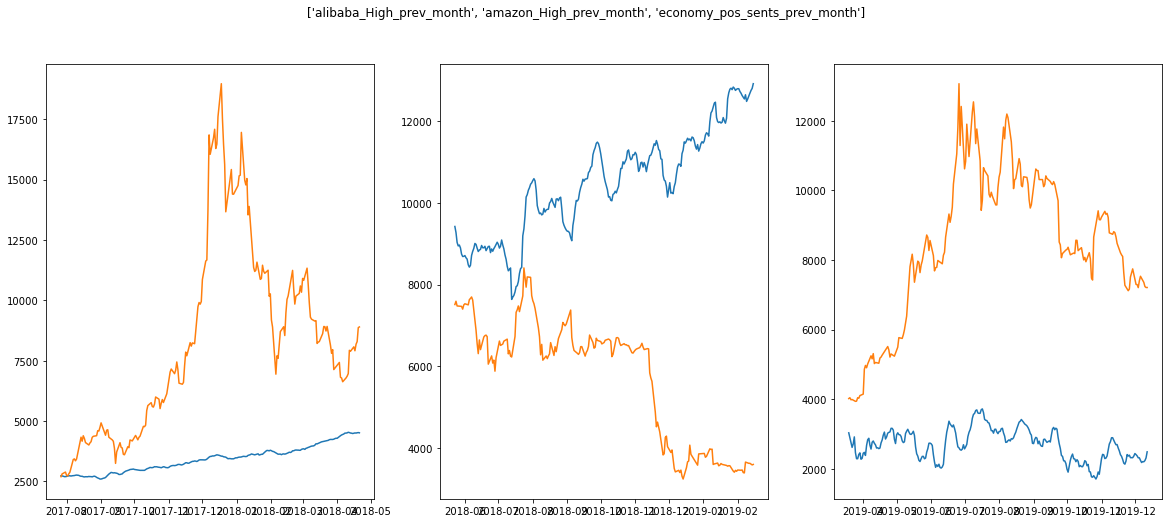

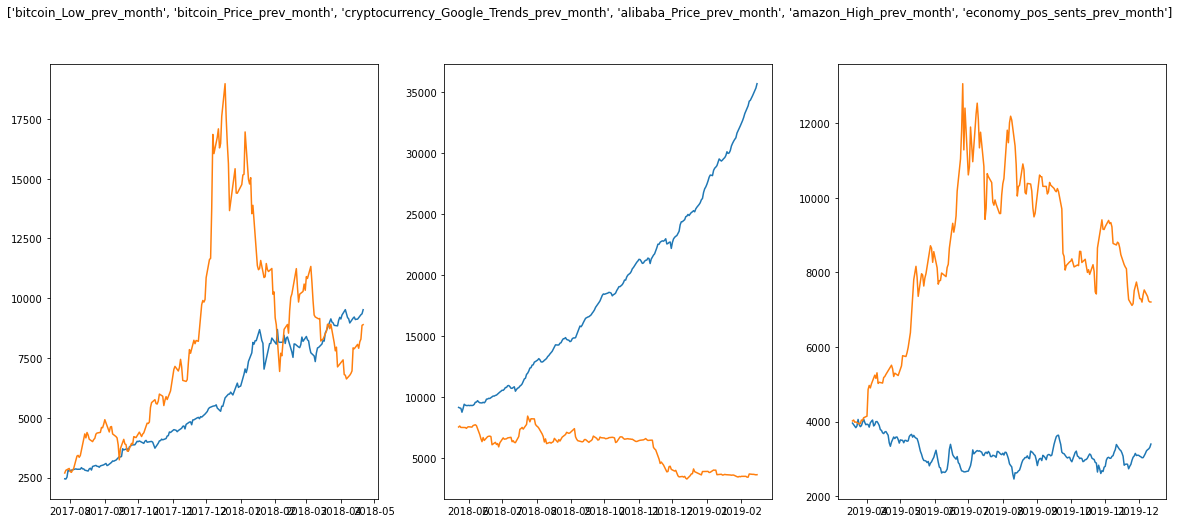

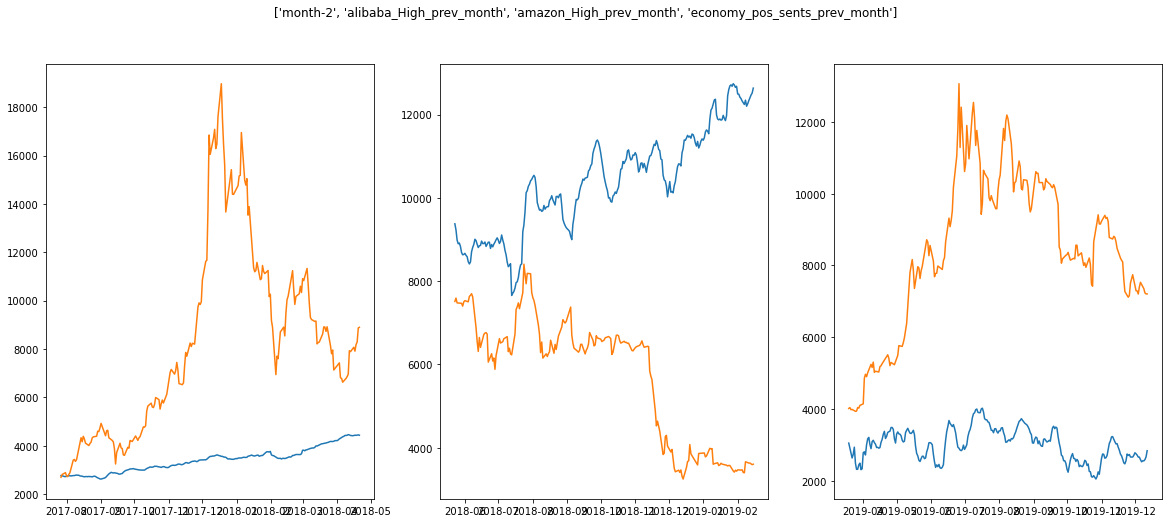

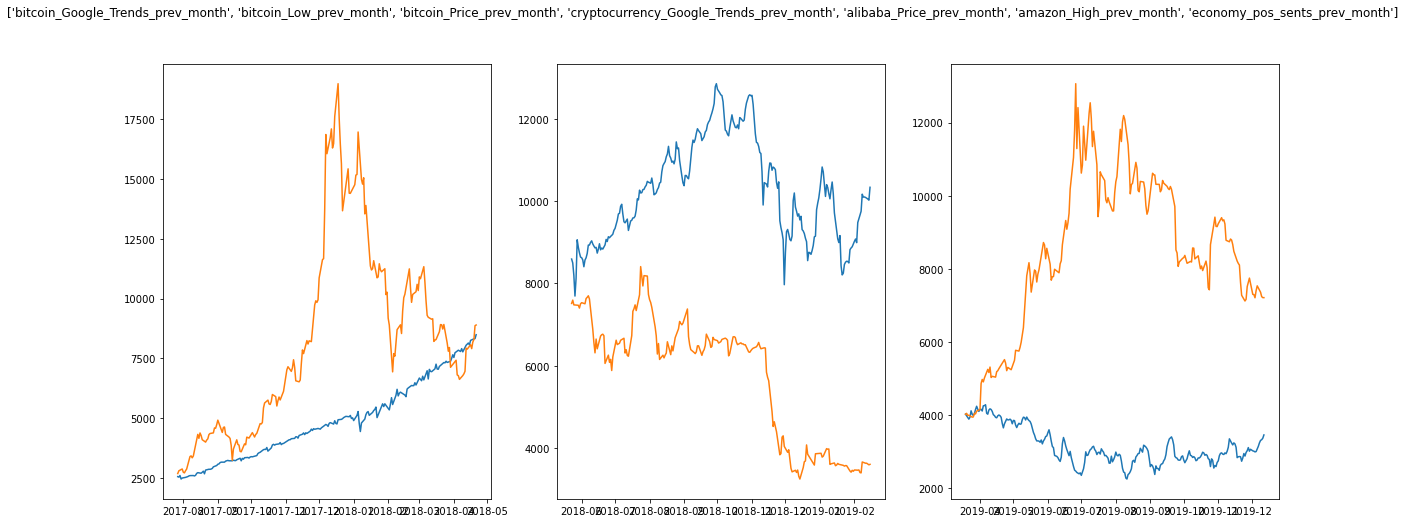

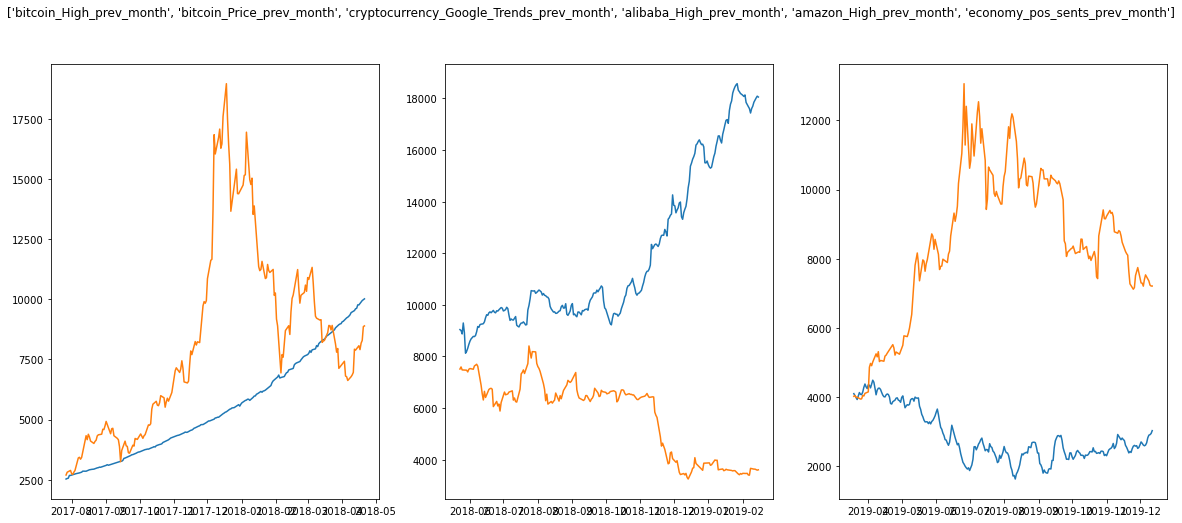

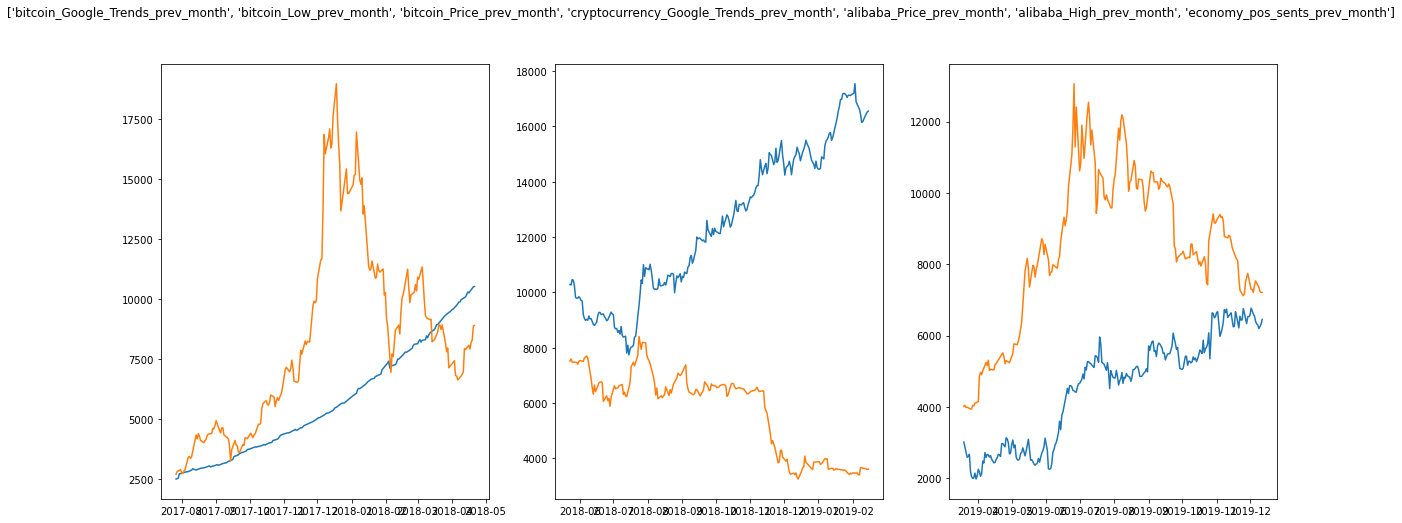

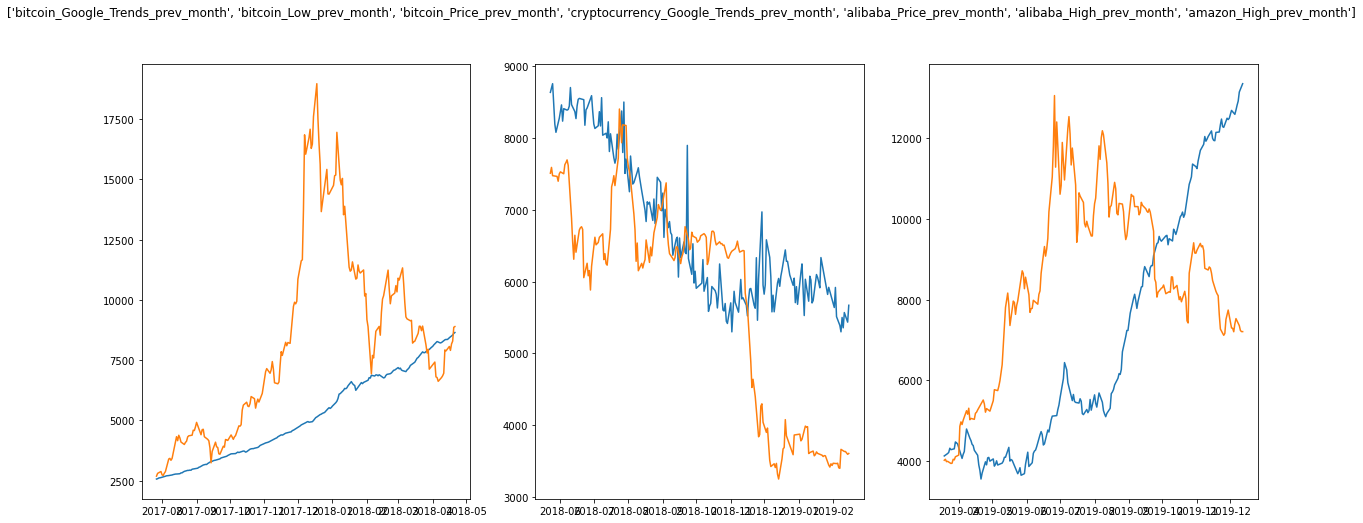

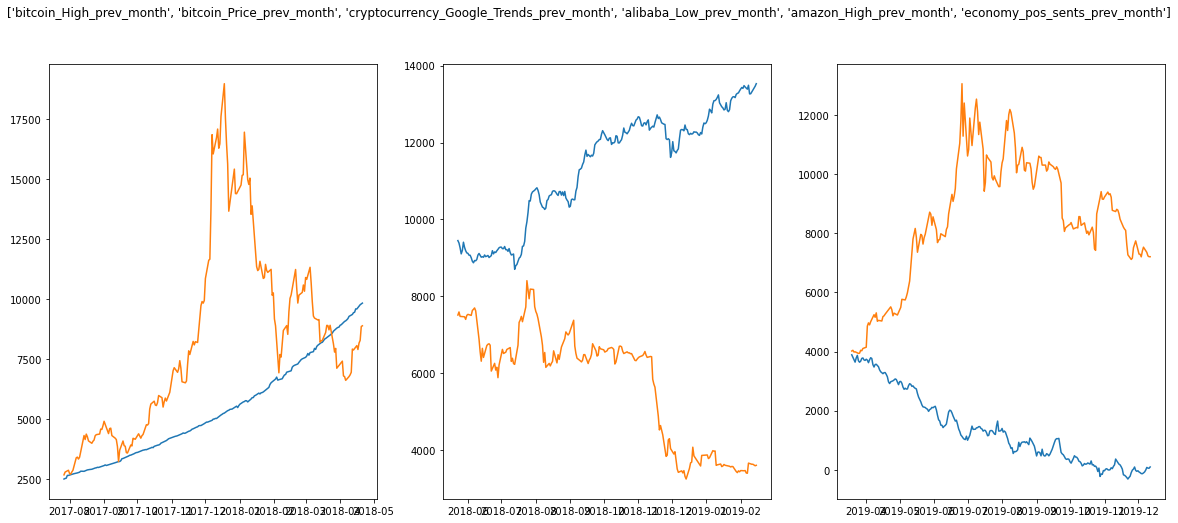

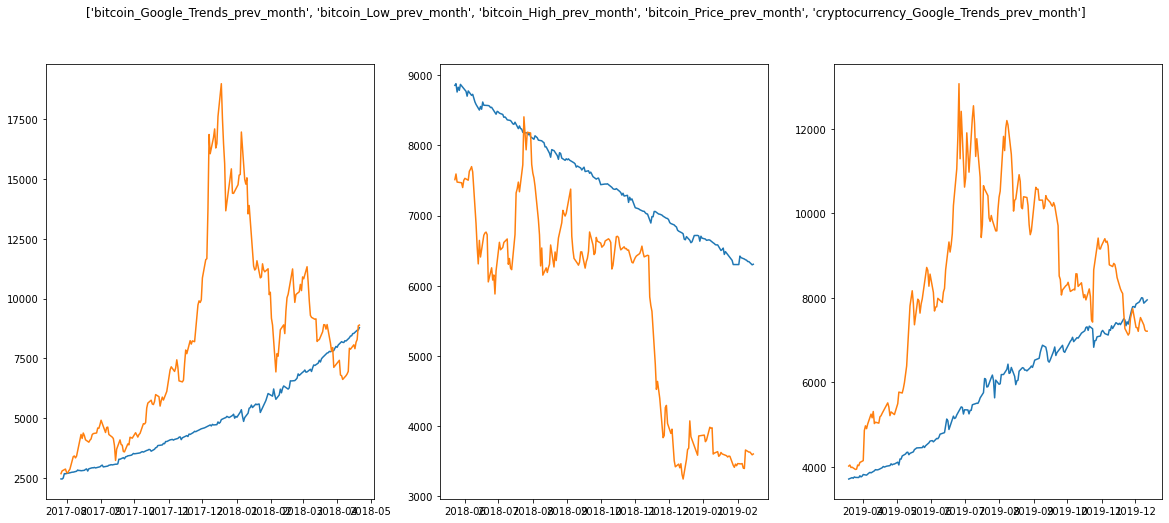

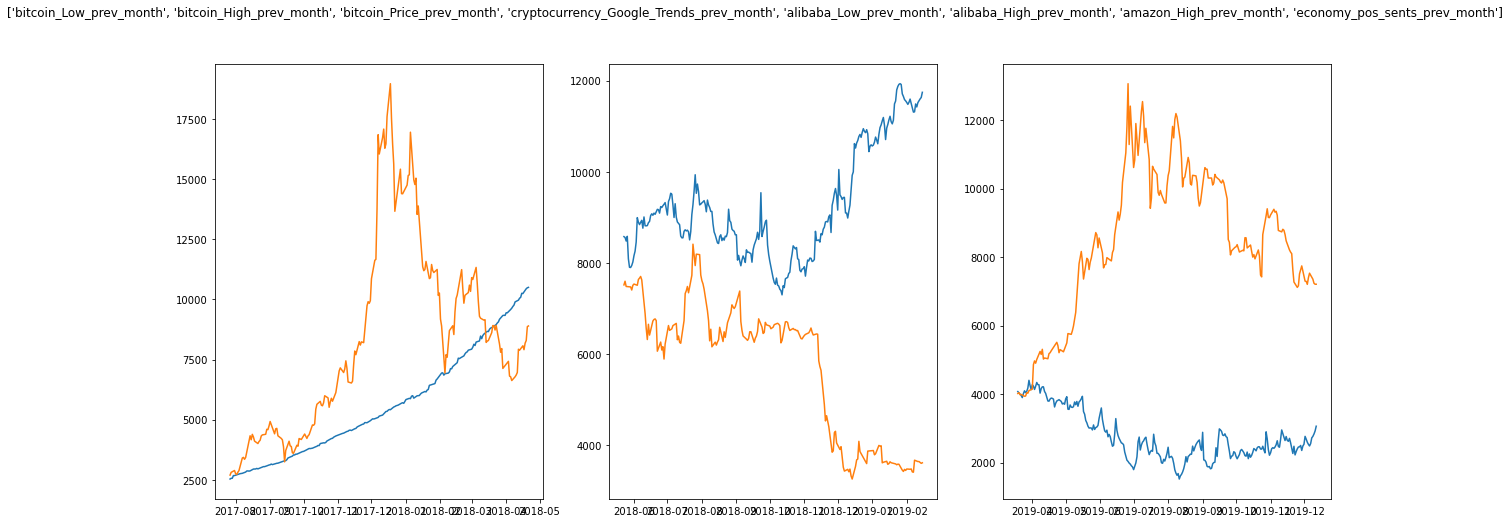

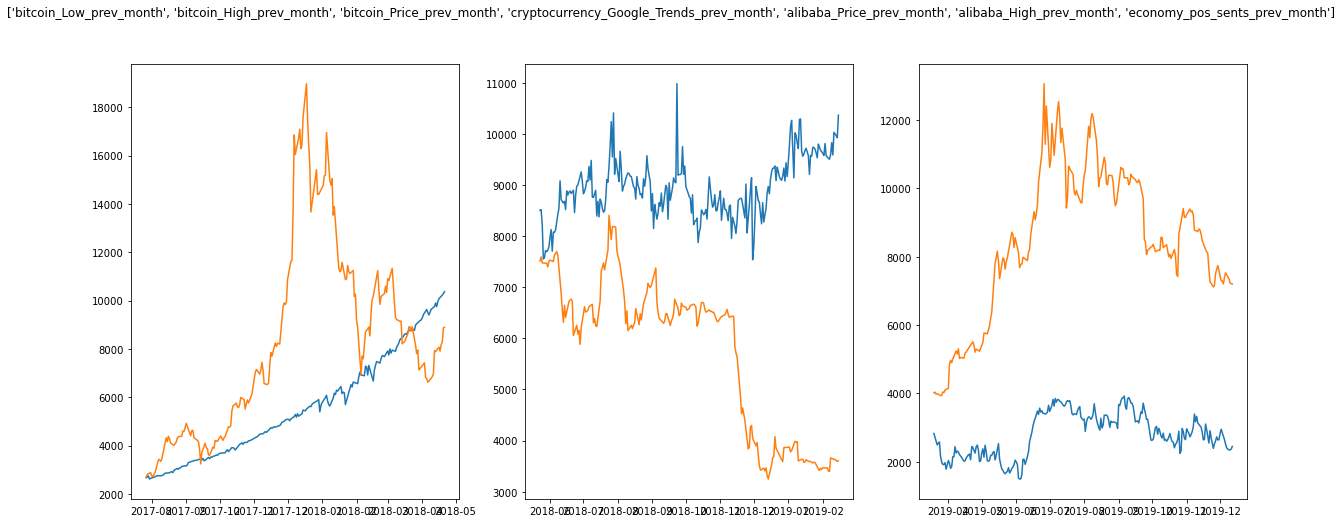

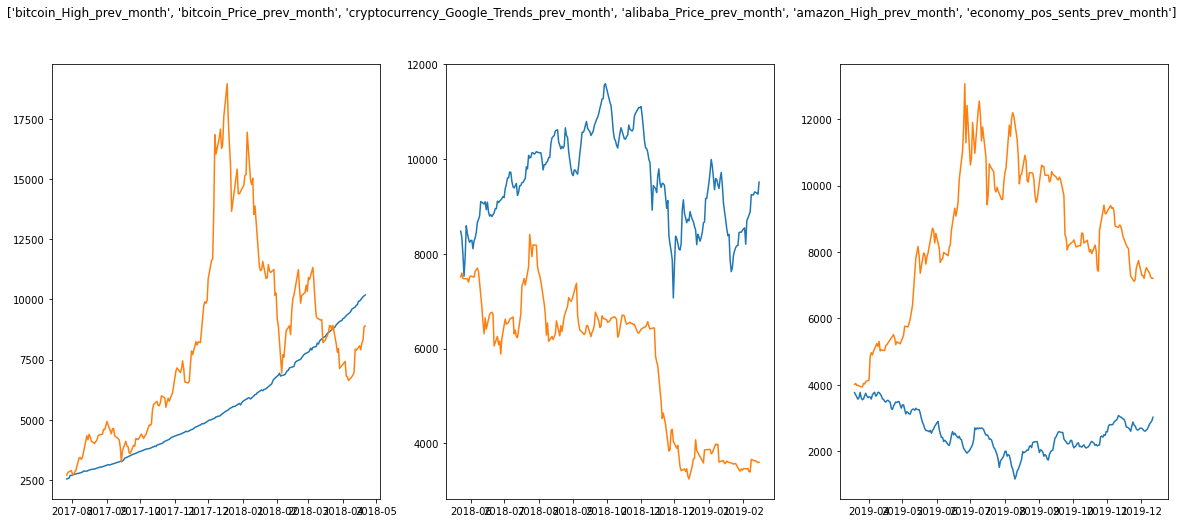

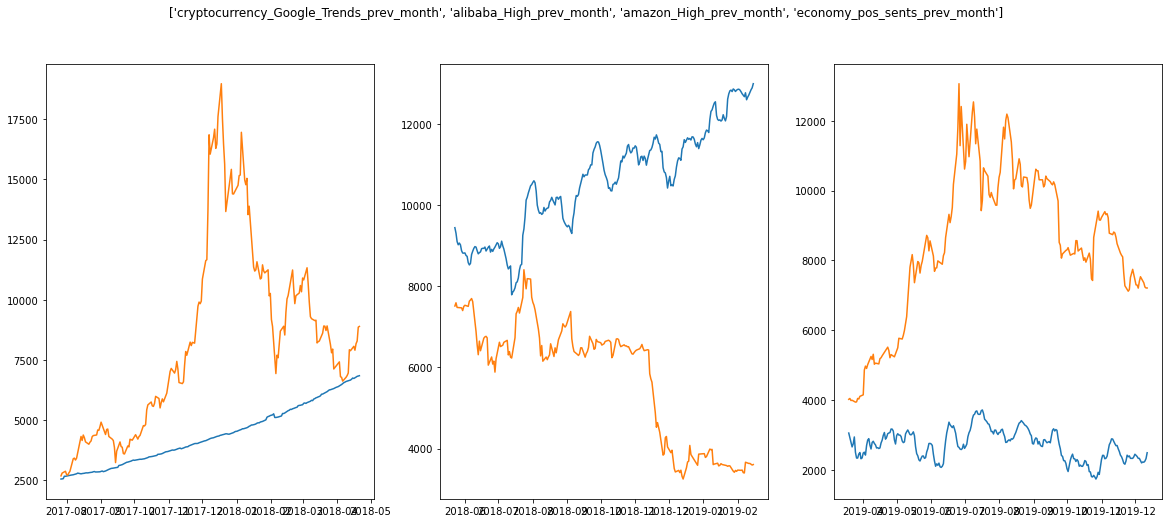

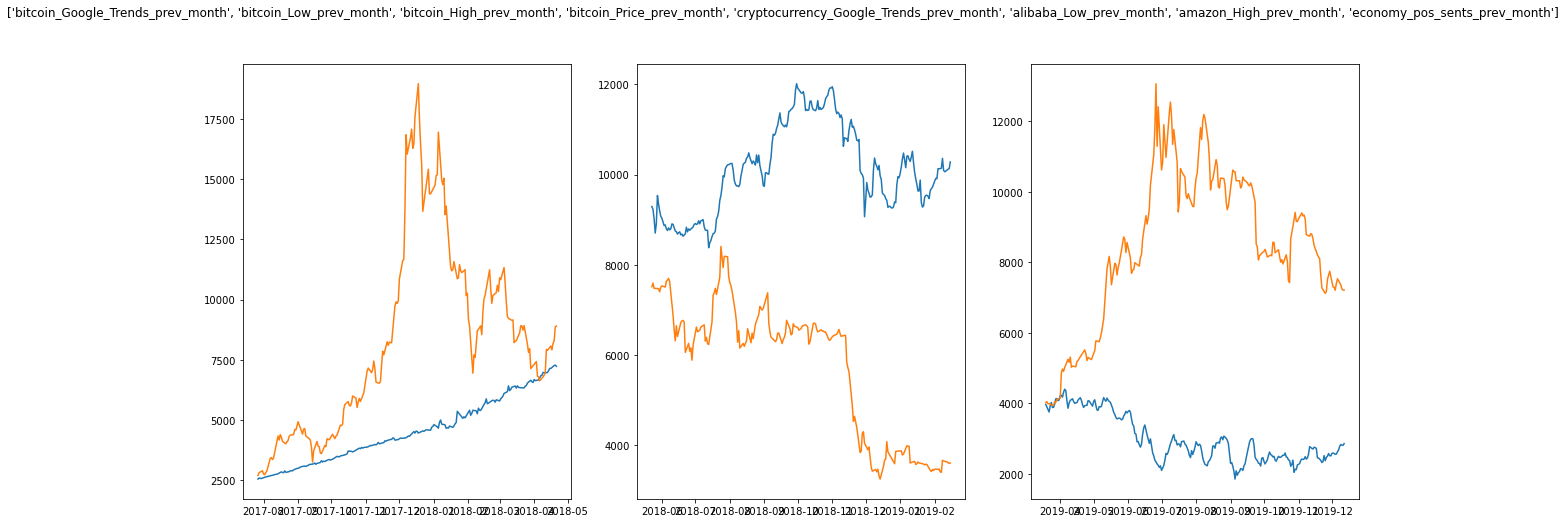

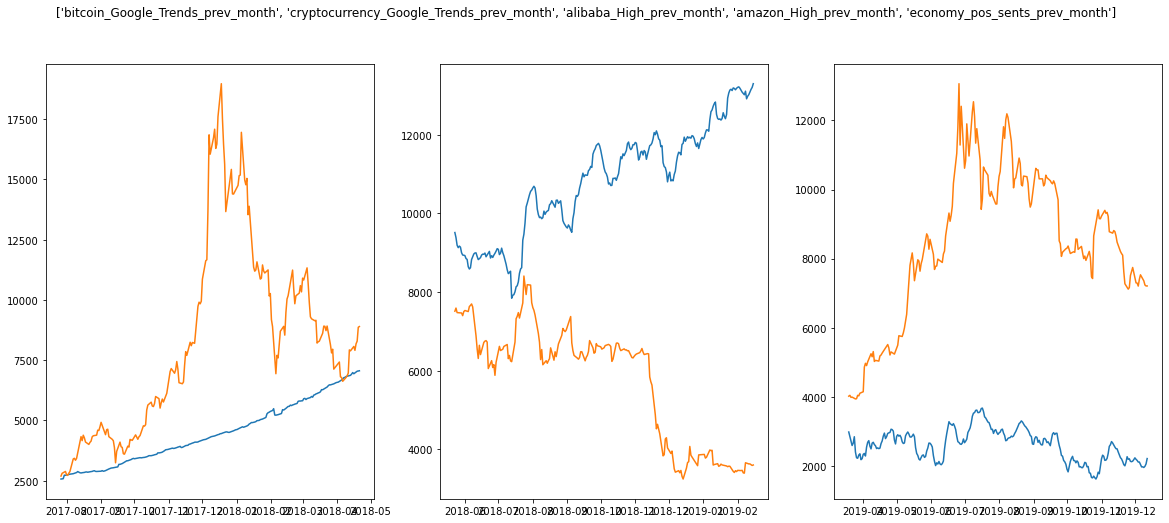

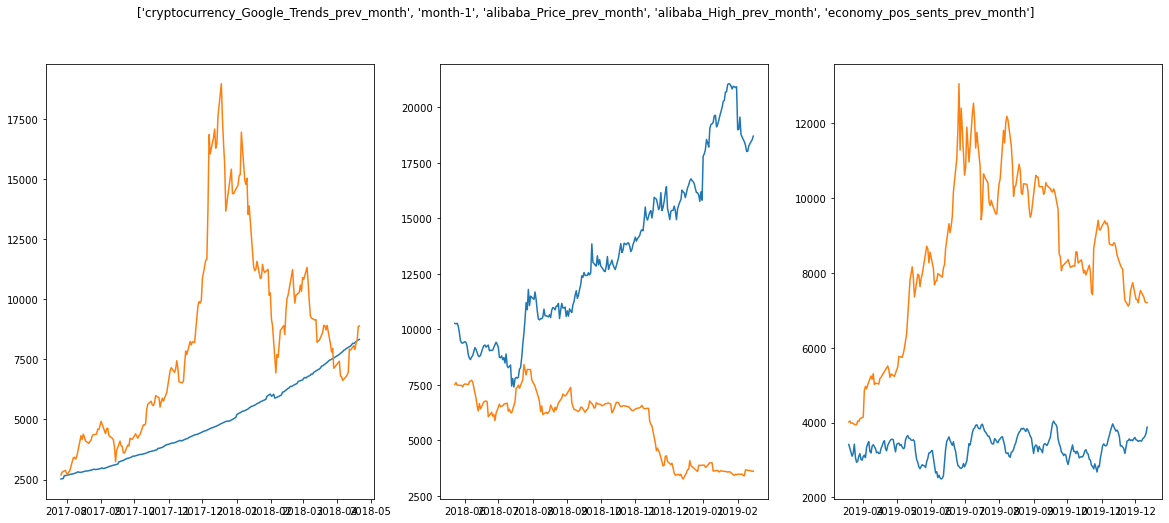

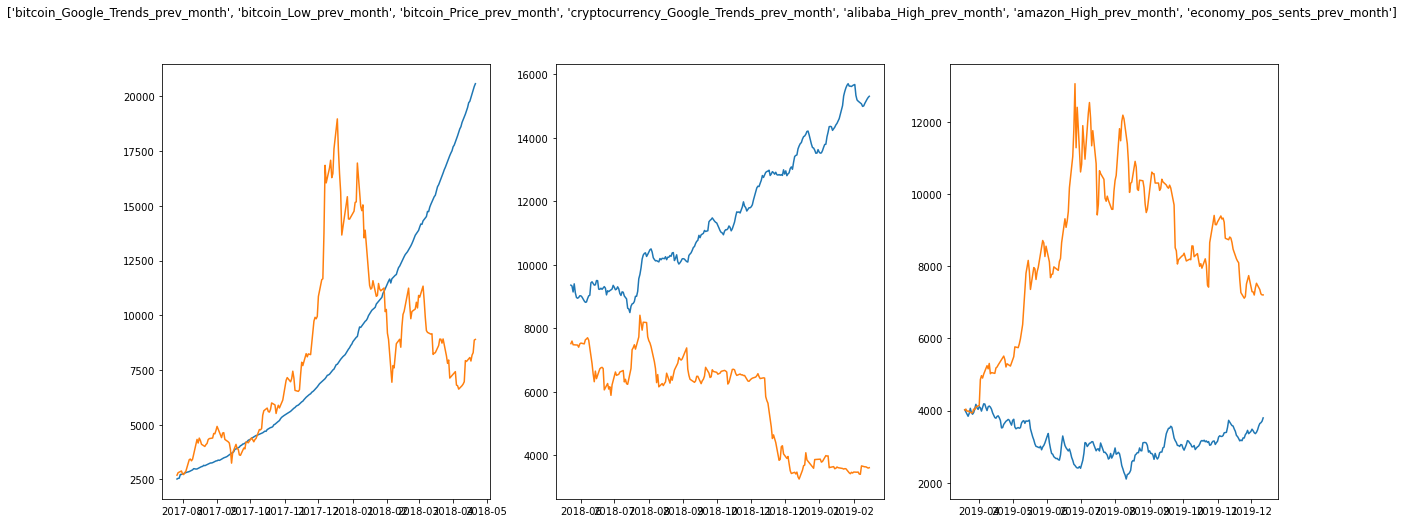

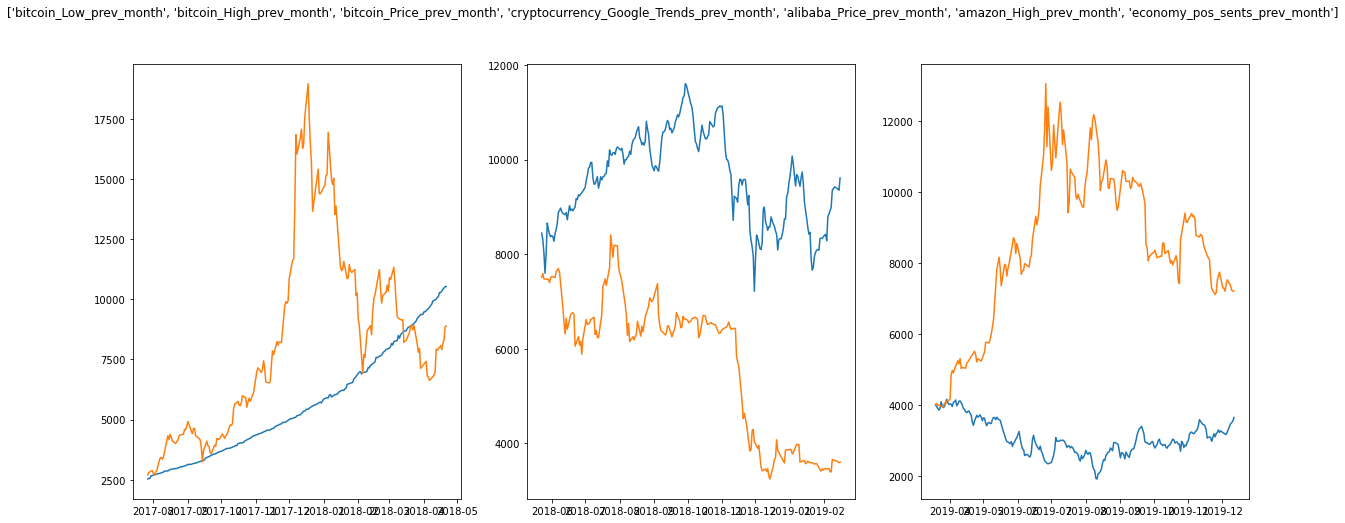

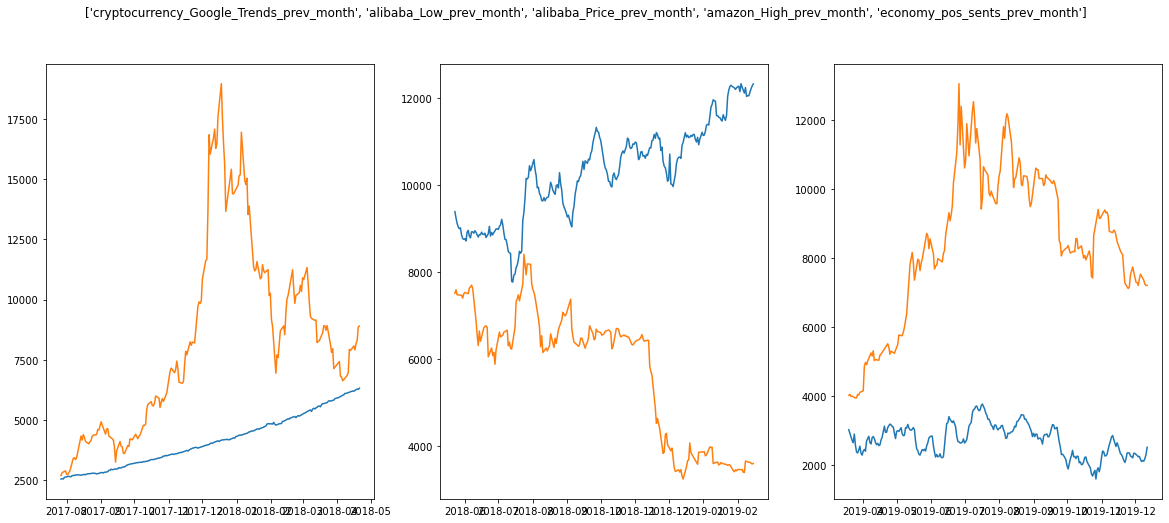

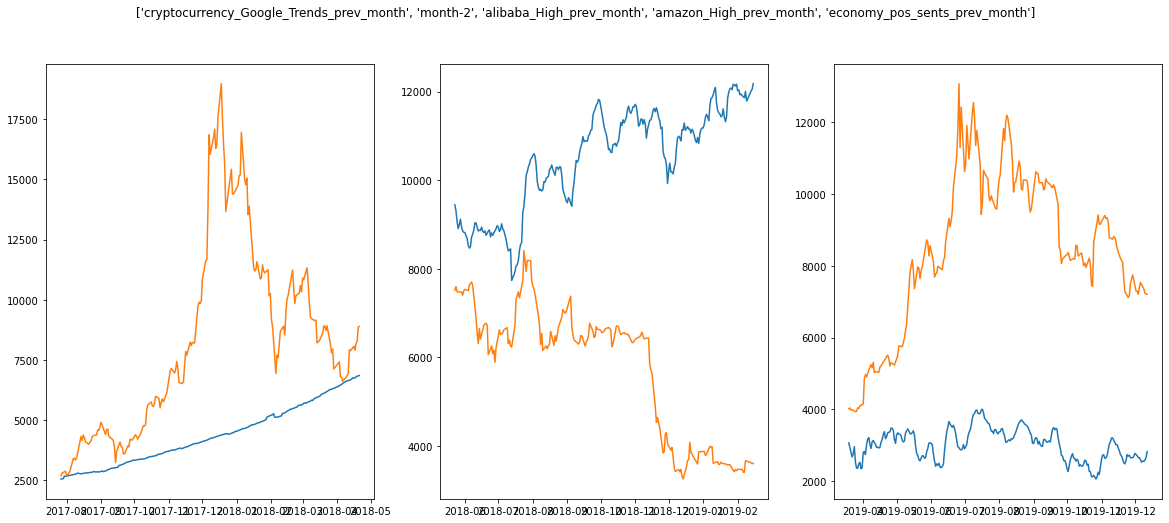

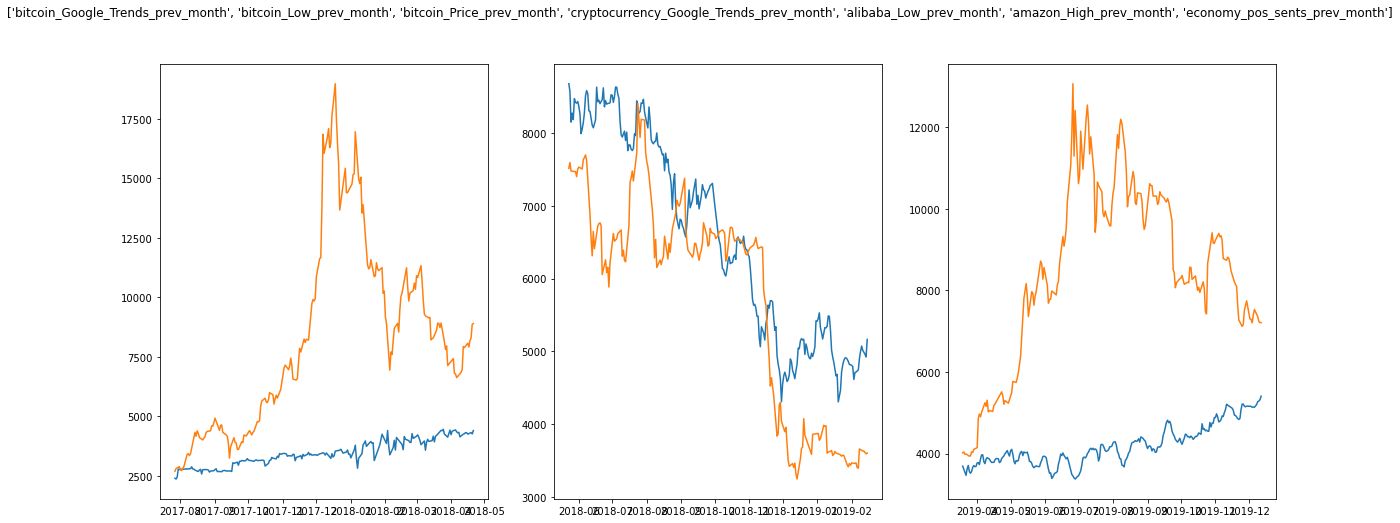

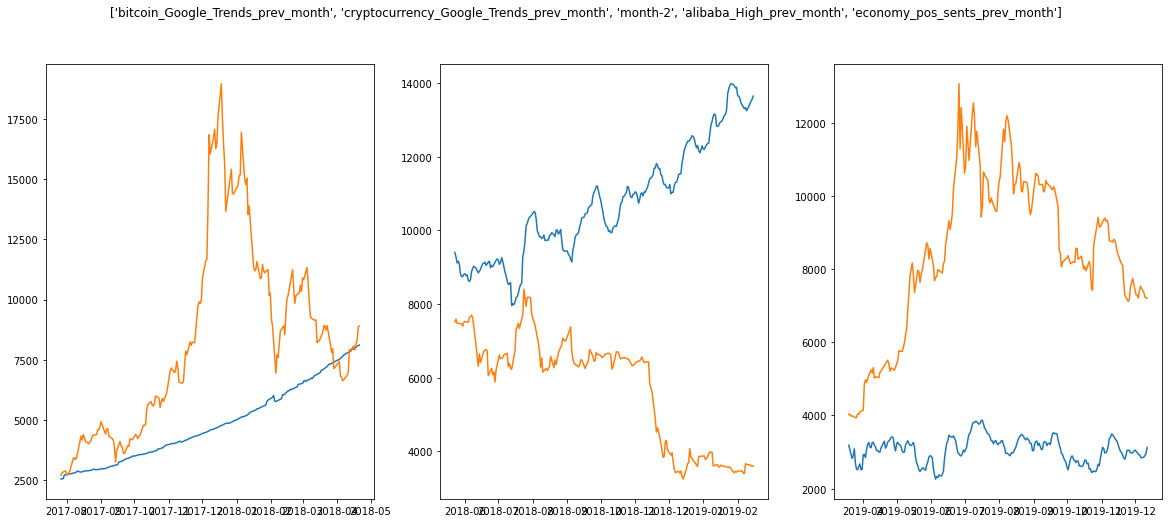

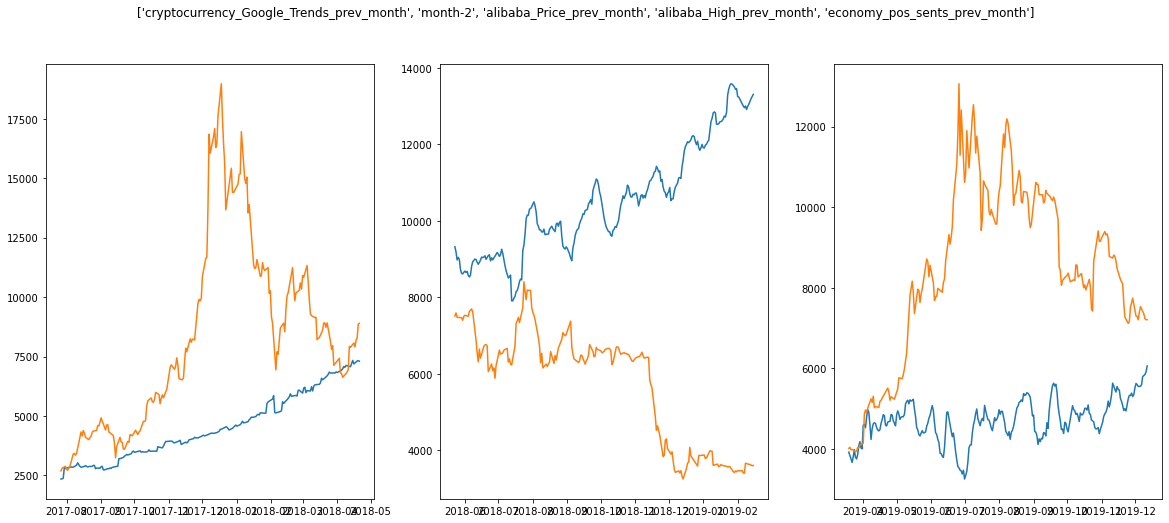

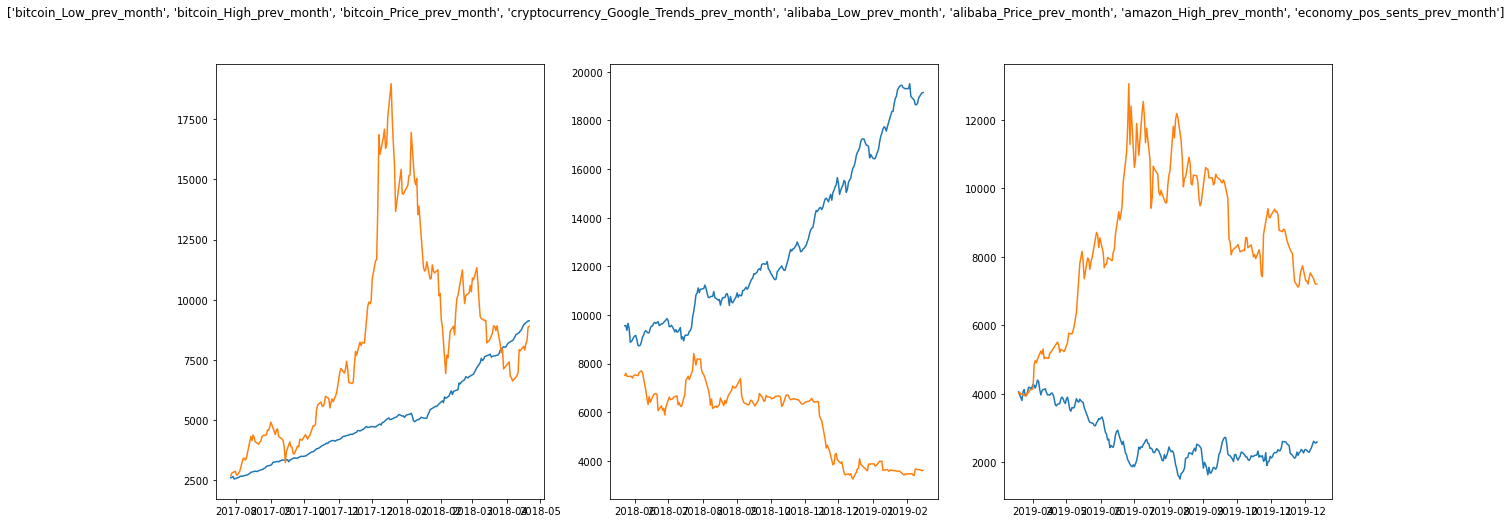

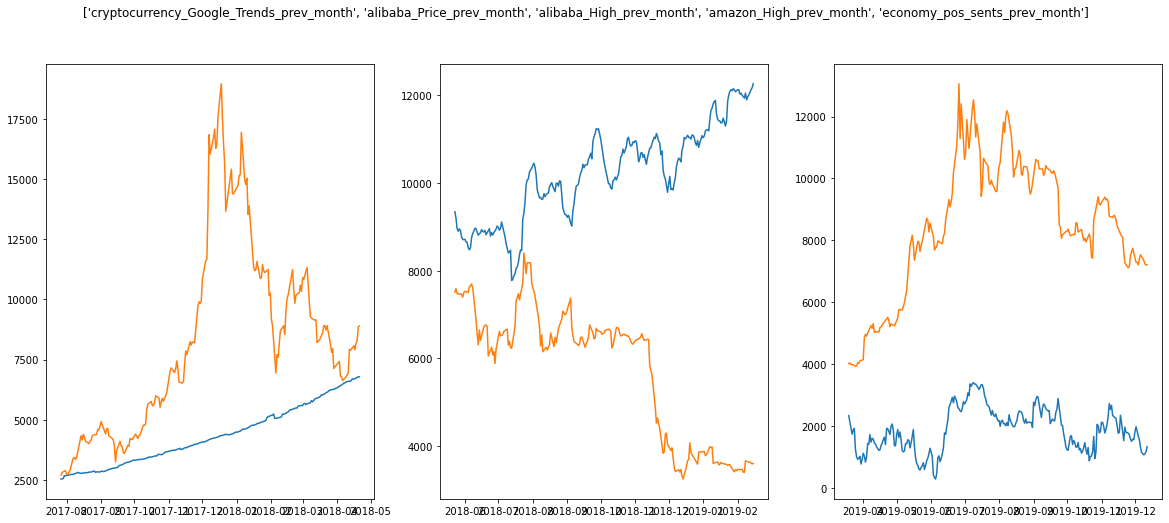

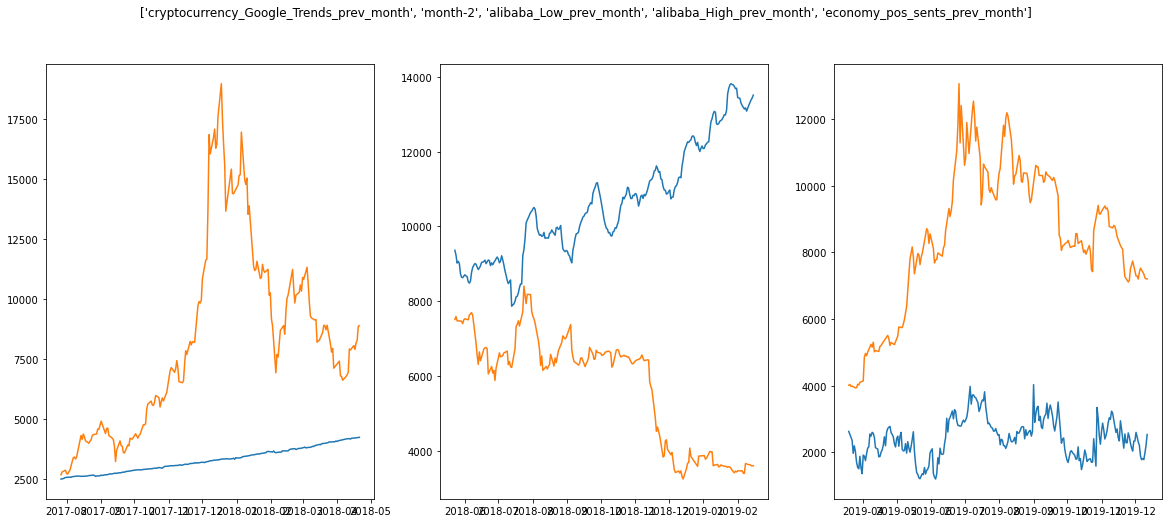

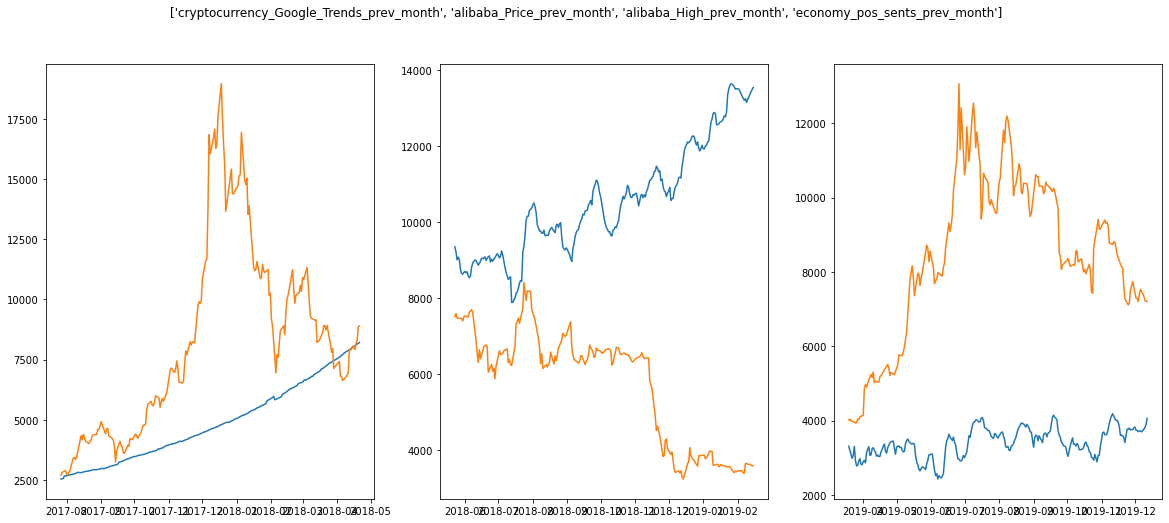

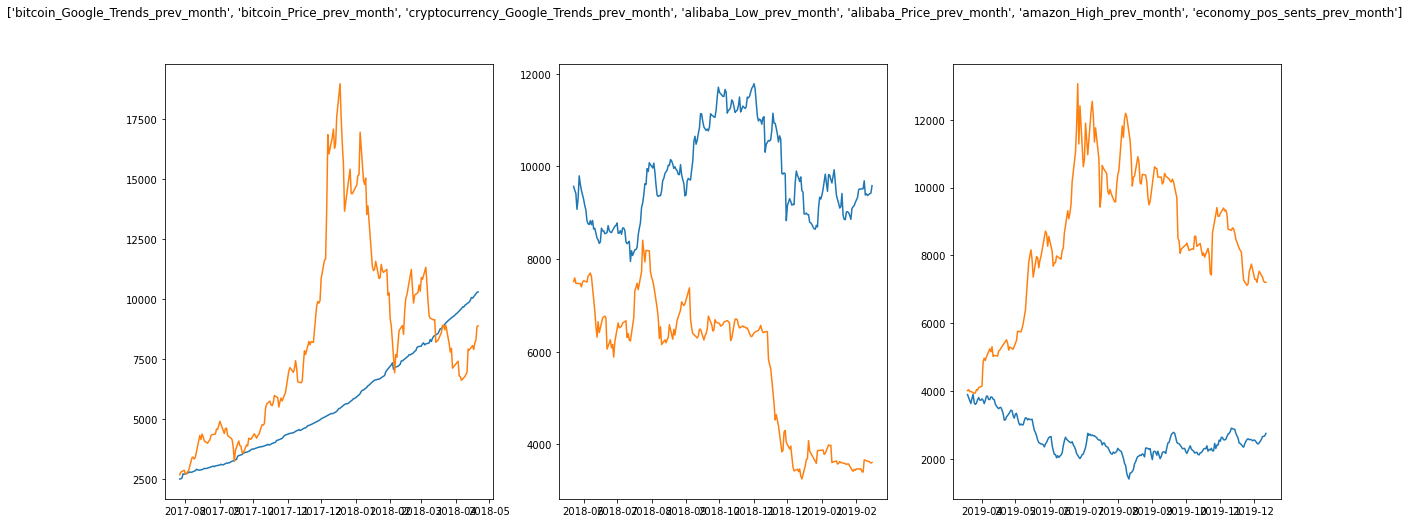

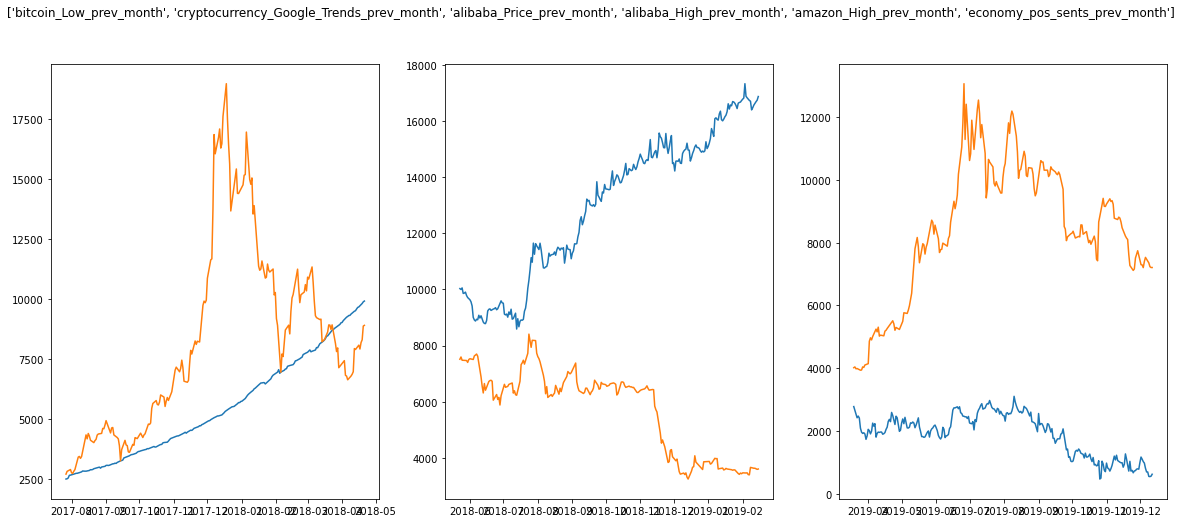

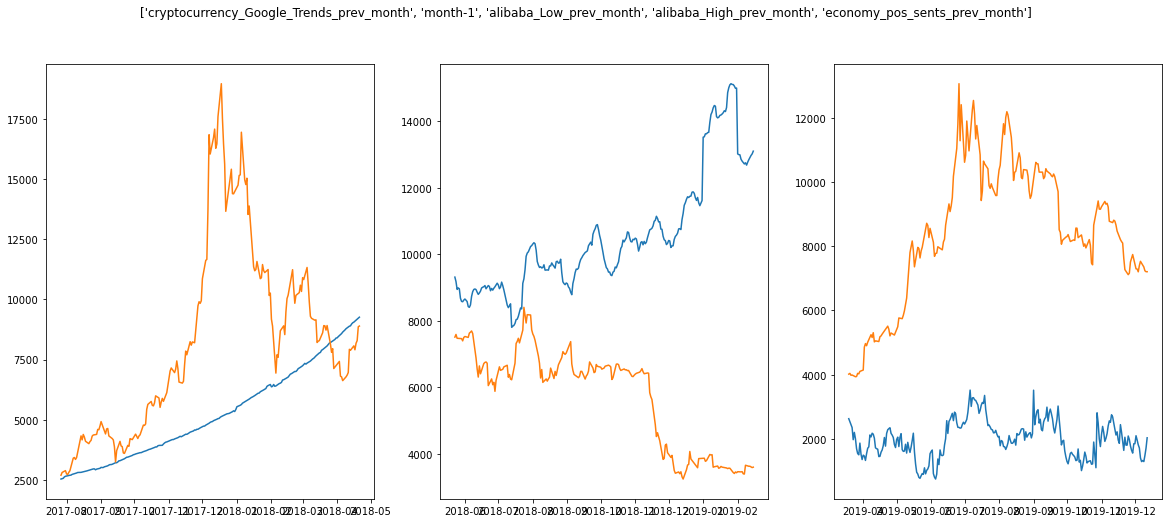

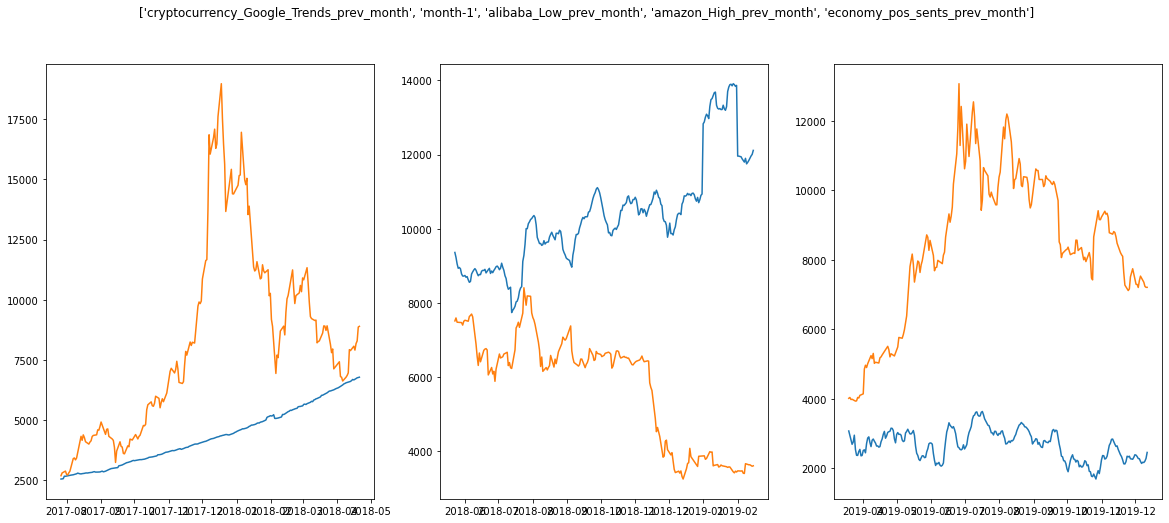

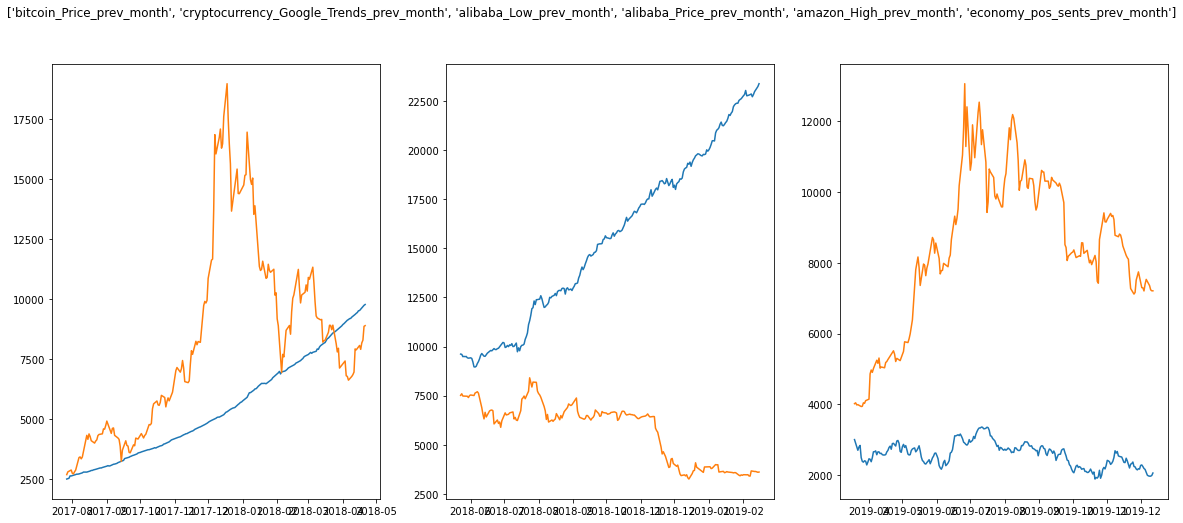

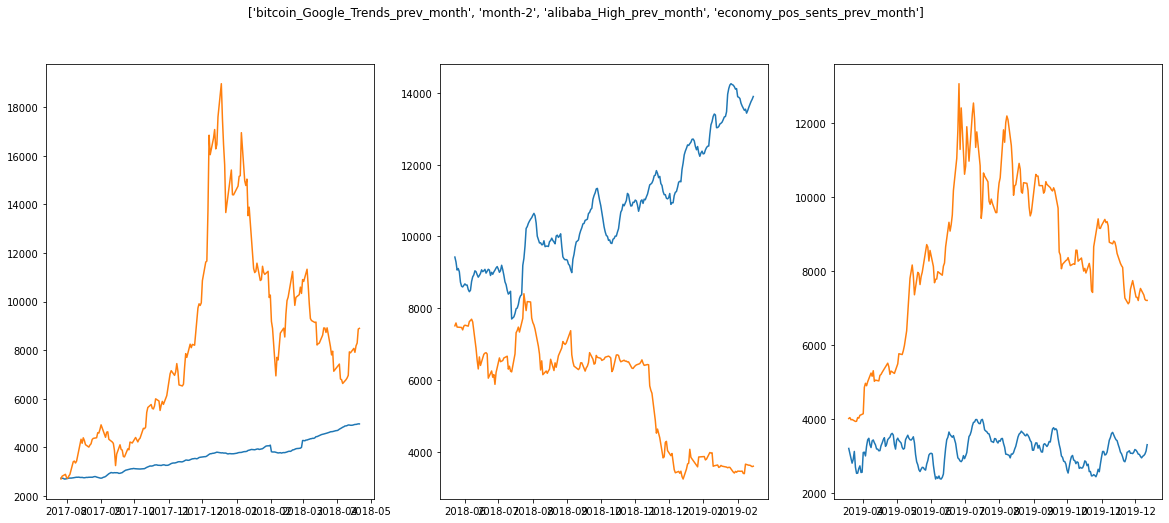

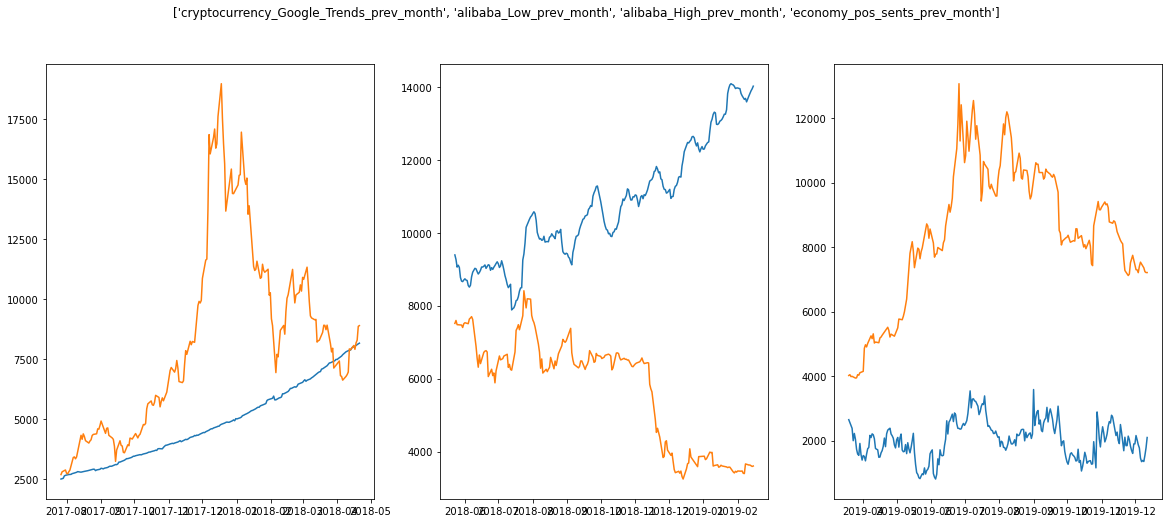

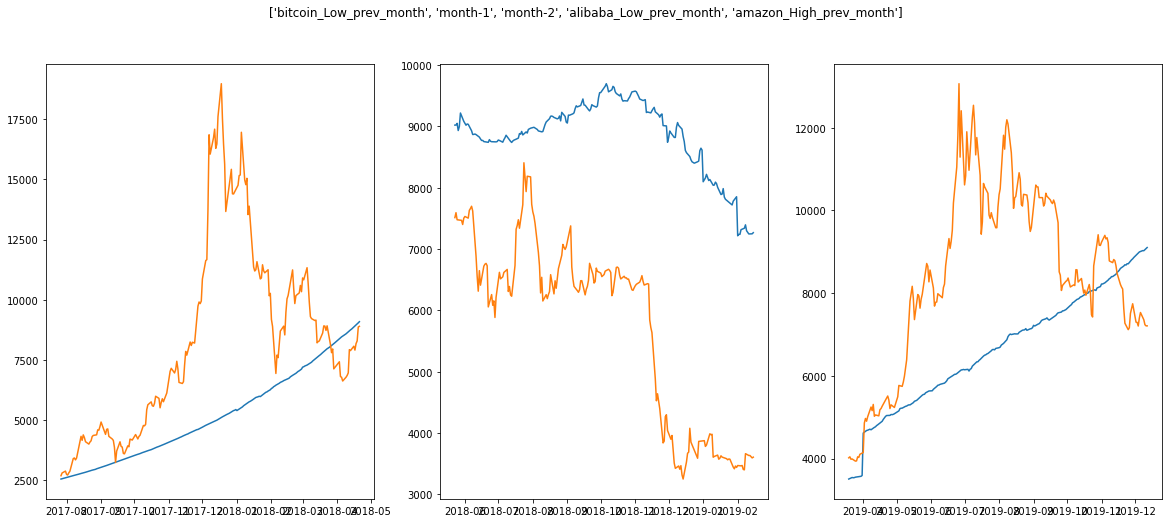

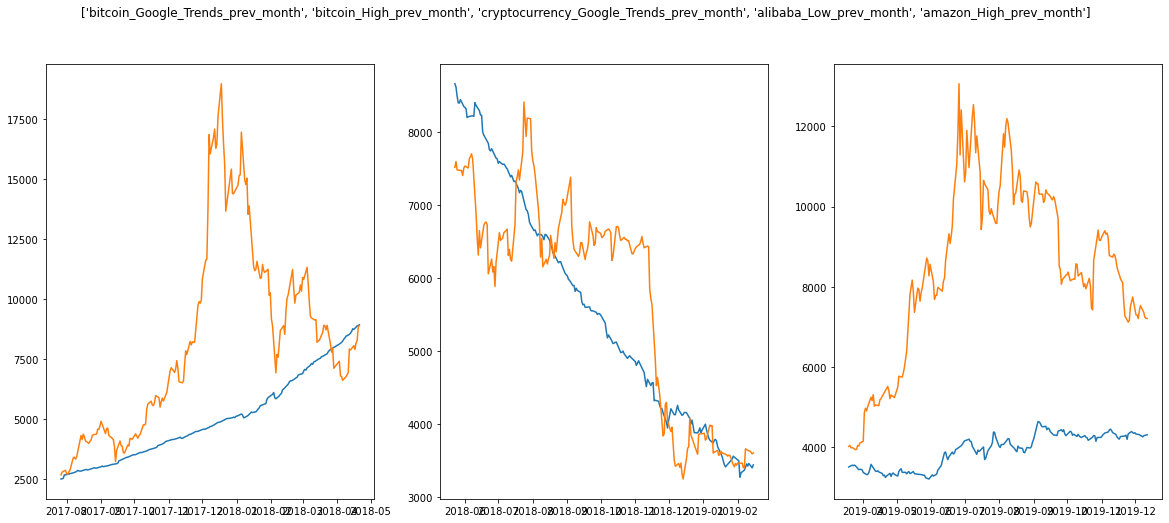

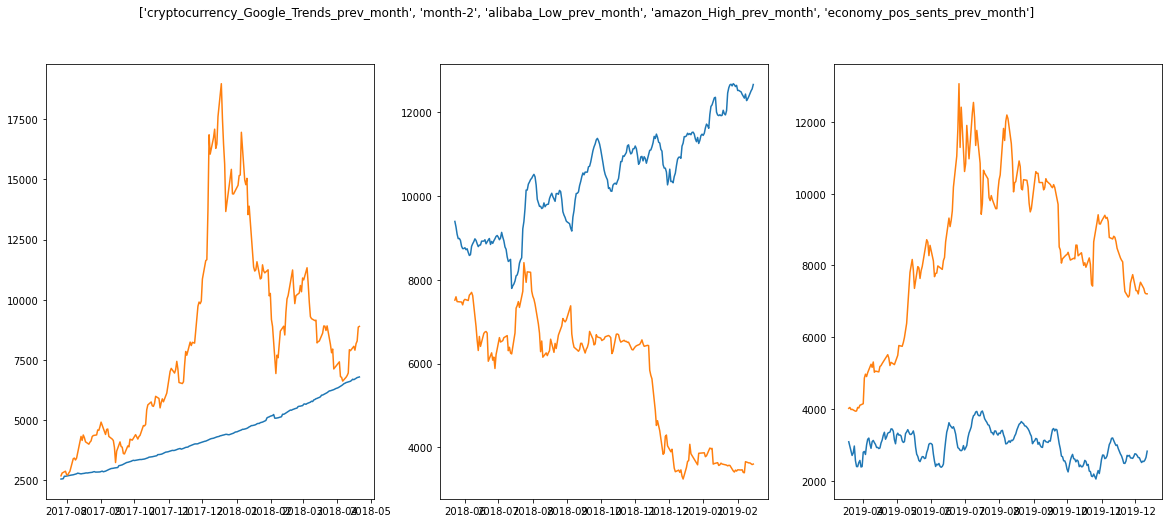

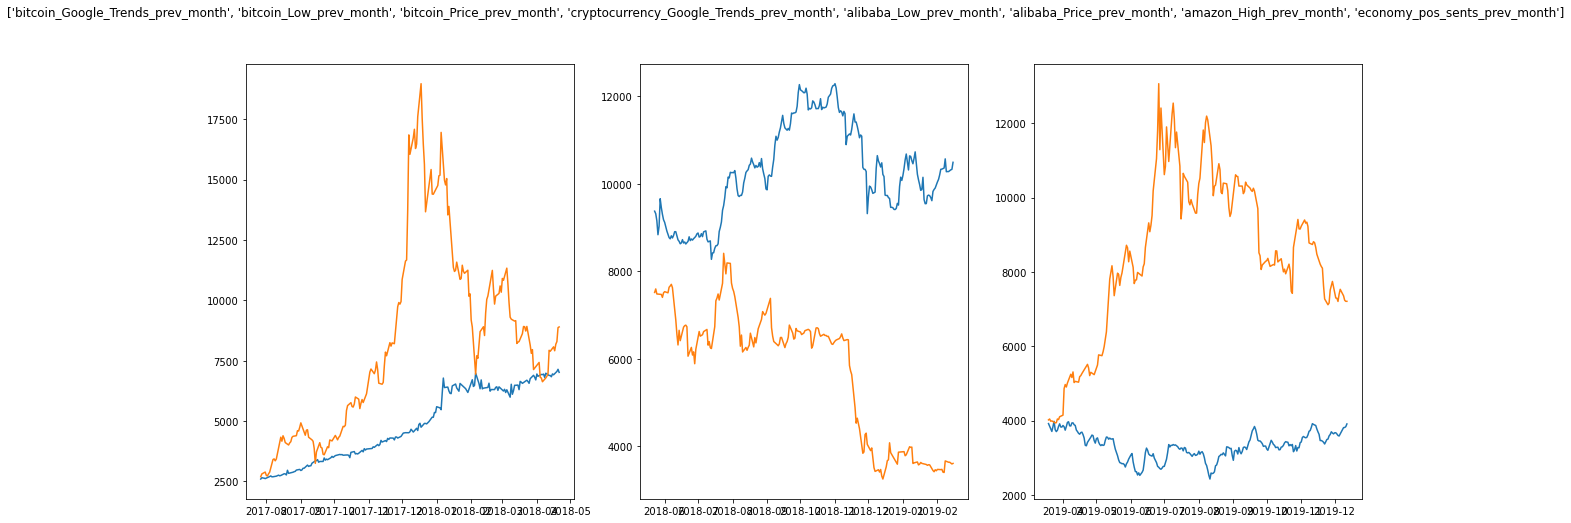

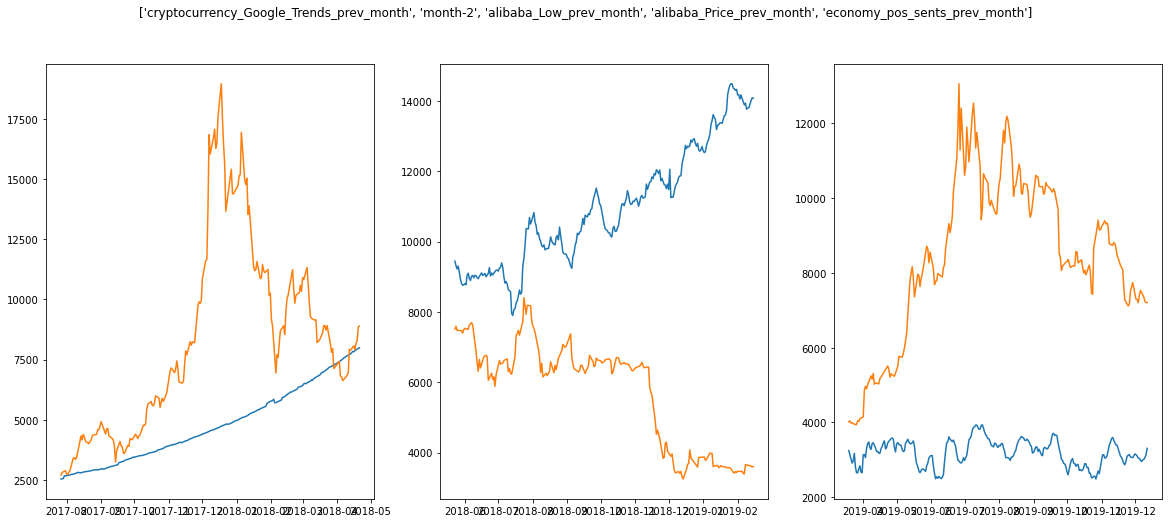

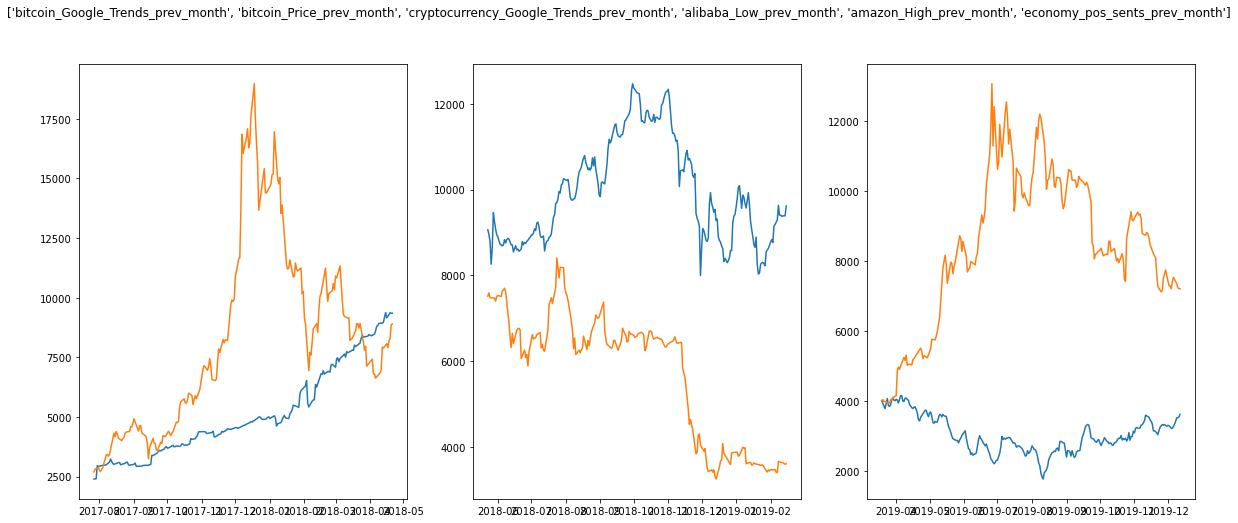

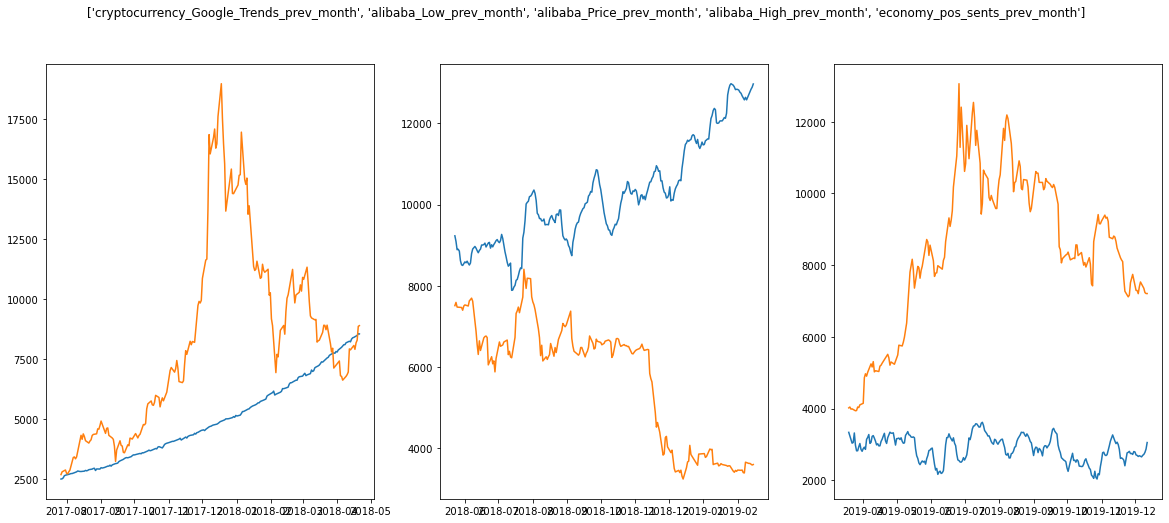

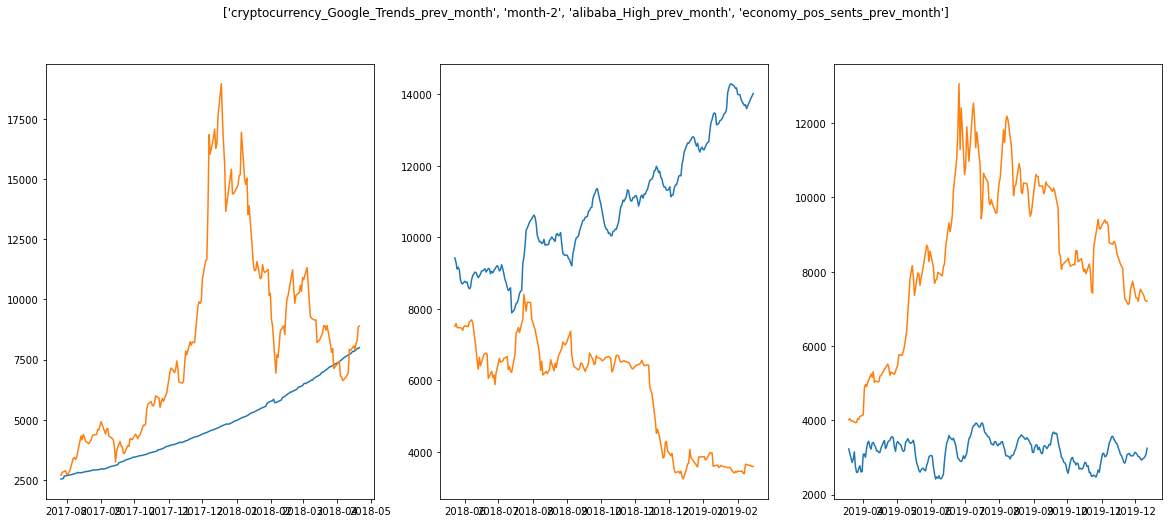

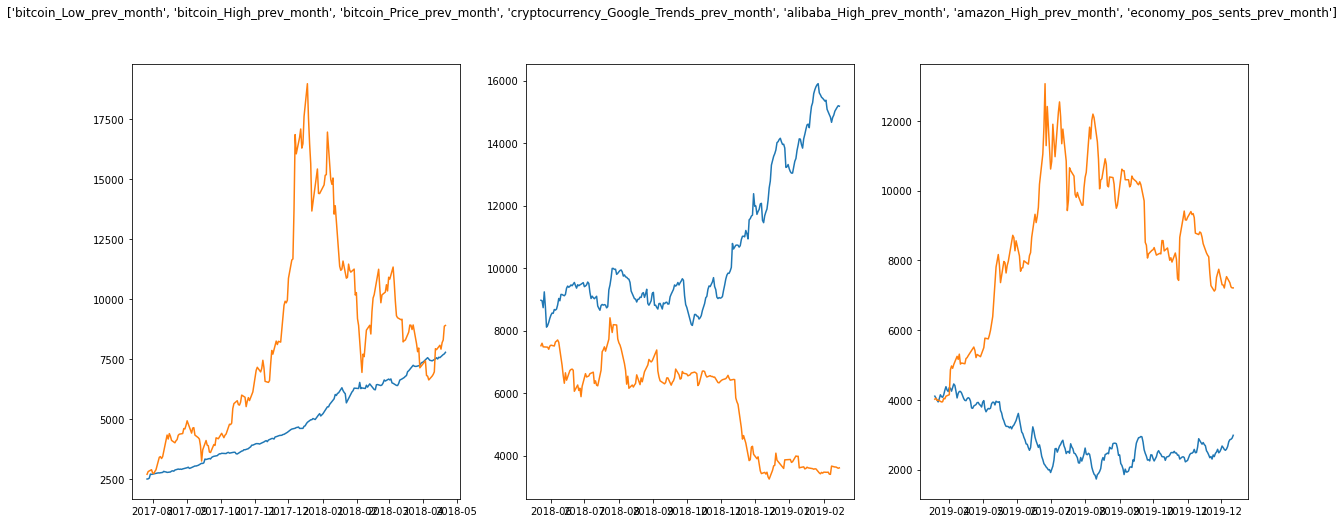

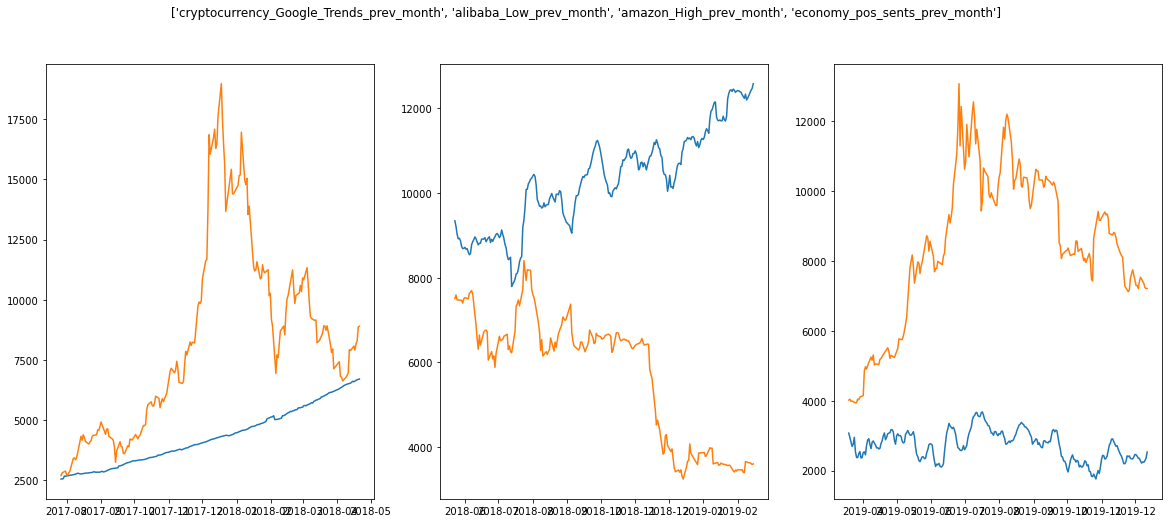

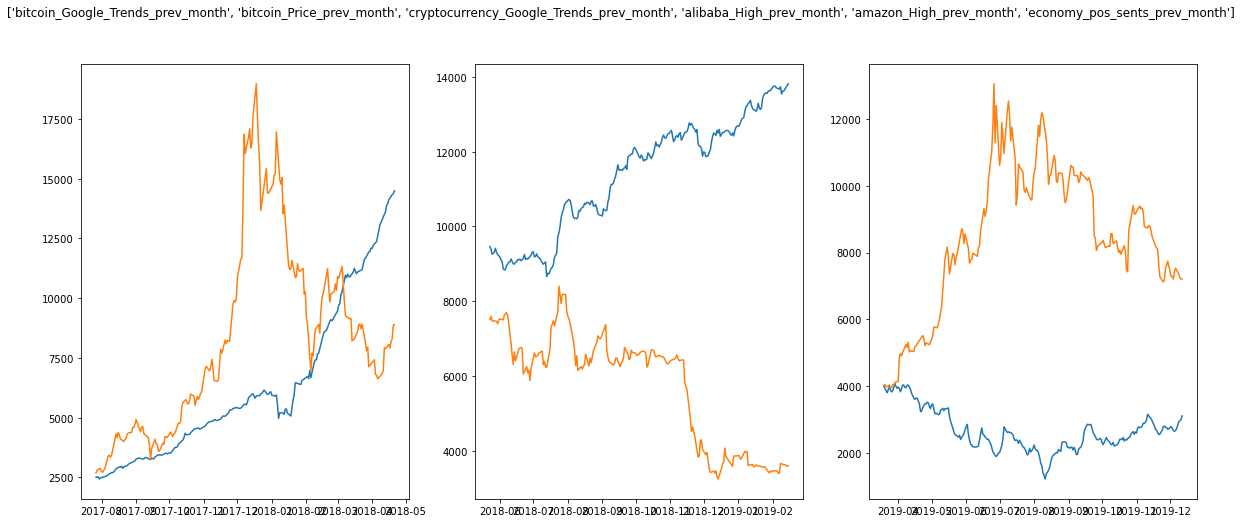

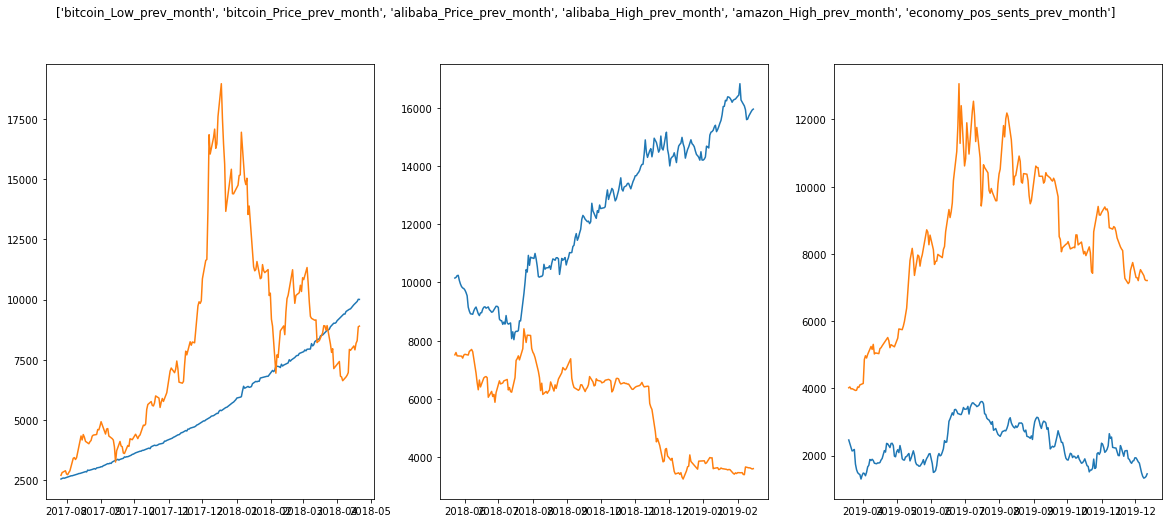

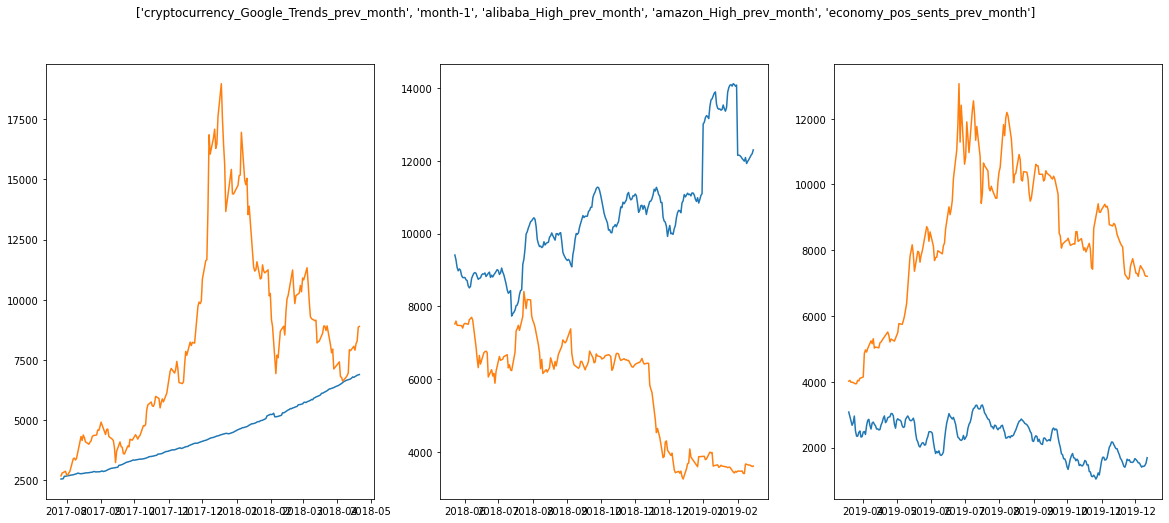

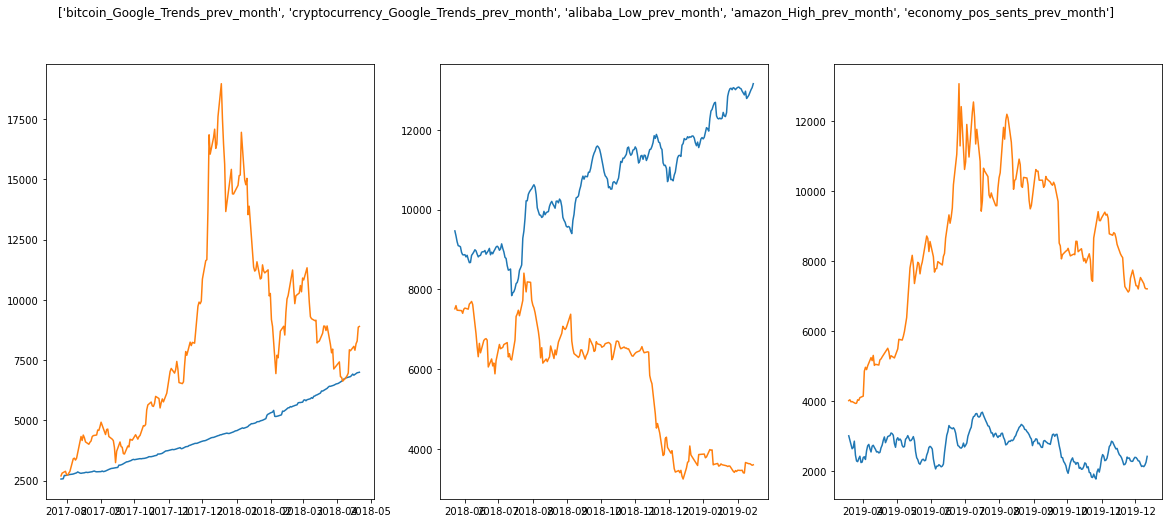

In [28]:
for features in feat_list:
    fig, ax = plt.subplots(1, 3, figsize=(20,8))
    index = 0
    for train, test in do.gen_return_splits():
    
        train["economy_pos_sents_prev_month"] = train["economy_pos_sents_prev_month"].rolling(window=10,min_periods=1).mean()
        test["economy_pos_sents_prev_month"] = test["economy_pos_sents_prev_month"].rolling(window=10,min_periods=1).mean()

        s1i1 = train['bitcoin_Price']
        exog_s1i1 = train[features]
        
        arimax = sm.tsa.statespace.SARIMAX(s1i1, 
                                       exog=exog_s1i1,
                                       enforce_invertibility=False, 
                                       enforce_stationarity=False, 
                                       freq='D').fit()
        
        exog = test[features]

        forecast = arimax.get_forecast(steps=len(test), exog=exog)
        
        ax[index].plot(test.index, forecast.predicted_mean)
        
        ax[index].plot(test.index, test["bitcoin_Price"])
        fig.suptitle(str(features))
        
        index = index + 1
    plt.show()